In [1]:
!pip install -U -q pip nltk gensim wordcloud textract textstat textblob spacy pyldavis goose3 numpy openpyxl

     |████████████████████████████████| 1.6MB 4.1MB/s 
     |████████████████████████████████| 1.5MB 17.9MB/s 
     |████████████████████████████████| 23.9MB 127kB/s 
     |████████████████████████████████| 368kB 44.6MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
     |████████████████████████████████| 12.8MB 202kB/s 
     |████████████████████████████████| 1.7MB 43.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 92kB 11.1MB/s 
     |████████████████████████████████| 15.7MB 199kB/s 
     |████████████████████████████████| 245kB 48.2MB/s 
     |████████████████████████████████| 8.9MB 24.1MB/s 
     |████████████████████████████████| 32.8MB 94kB/s 
     |████████████████████████████████| 112kB 40.8MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 112kB 49.4MB

In [2]:
import os
import time
import codecs
import string
import re
from collections import Counter
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import urllib
import requests
from bs4 import BeautifulSoup

import spacy
import nltk
import networkx as nx
import gensim
from wordcloud import WordCloud
import textract
import pyLDAvis
import pyLDAvis.gensim_models
import textstat
import textblob

from IPython.core.display import Image
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [4]:


!pip install -U spacy

!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm
!python -m spacy download pt_core_news_sm
!python -m spacy download de_core_news_md

!python -m spacy validate



2021-06-28 18:24:39.457809: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 13.7 MB 1.5 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2021-06-28 18:24:48.508131: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
2021-06-28 18:24:57.072928: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 22.1 MB 56 kB/s 
✔ 

In [8]:
import spacy 

In [40]:
nlp = spacy.load("de_core_news_sm")

In [41]:
doc = nlp(u""" Bayerns Innenminister Joachim Herrmann sieht einen "eklatanten Verdacht" auf einen islamistischen Hintergrund bei der Messerattacke von Würzburg. "Es spricht sehr viel angesichts dessen, was wir aufgefunden haben, dafür, dass es sich um eine islamistisch motivierte Tat handeln könnte", sagte der CSU-Politiker am Sonntag im "Bild live"-Talk "Die richtigen Fragen". Die in der Unterkunft des 24-jährigen Somaliers gefundenen Gegenstände werden von Islamwissenschaftern bewertet. "Aber wir sind bei Weitem noch nicht so weit, dass wir sagen können, wir haben es ausgewertet", sagte ein Sprecher des bayerischen Landeskriminalamtes (LKA) am Montag in München. Zu den Funden zählen auch zwei Handys. "Wir gehen davon aus, dass sie ihm gehören", sagte der Sprecher mit Verweis auf den 24 Jahre alten Verdächtigen aus dem afrikanischen Bürgerkriegsland Somalia.

Welche weiteren Gegenstände nun untersucht und bewertet werden, sagte der Sprecher nicht. Damit ist unklar, ob unter anderem auch Schriftstücke entdeckt wurden, die auf ein politisches Motiv hindeuten könnten.

Bisher ist nicht bekannt, warum der Migrant am Freitag in Würzburg drei Frauen mit einem Messer tötete und sieben Menschen verletzte, fünf davon lebensbedrohlich. Womöglich war der Mann geistig verwirrt oder psychisch krank, wie Ermittler vermuten. Es werde aber auch geprüft, ob islamistische Einstellungen zur Tat beigetragen haben könnten.

Der Flüchtling hatte am Freitagnachmittag in Würzburg drei Frauen erstochen und sieben Menschen verletzt, fünf davon lebensgefährlich. Er wurde festgenommen und ist in Untersuchungshaft. Unklar ist bisher, inwieweit die Psyche des wiederholt psychisch auffälligen Mannes eine Rolle gespielt hat und ob auch islamistische Einstellungen zur Tat beigetragen haben könnten.

Ermittler hatten in dem Obdachlosenheim, in dem der Mann zuletzt lebte, Schriftmaterial gefunden, das Hassbotschaften enthalten soll. Das Material wurde sichergestellt, für die Auswertung müssen die Unterlagen aber erst übersetzt werden, ebenso wie Nachrichten auf den Handys des Mannes. Dafür müssten Dolmetscher gefunden werden, die bei der Auswertung von Handynachrichten oder Schriftstücken helfen könnten, erklärte ein Sprecher des Landeskriminalamtes.

Die drei Frauen im Alter von 24, 49 und 82 Jahren, die der Mann tötete, waren ihm offensichtlich unbekannt. Zudem verletzte er laut Polizei drei weitere Frauen (39, 52, 73), ein Mädchen (11) und einen Jugendlichen (16) lebensgefährlich mit einem Messer sowie einen Mann (57) und eine weitere Frau (26) leicht. Das elf Jahre alte Mädchen ist die Tochter der getöteten 49-Jährigen.

Bayerns Ministerpräsident Markus Söder (CSU) sprach bei einer Gedenkfeier am Sonntag in der Mainstadt von einem brutalen und verstörenden Verbrechen. "Wo liegt der Sinn dahinter?" Viele Menschen fragten nach dem Warum. "Wir dürfen eine solche hasserfüllte Tat niemals mit Hass oder Rache beantworten", sagte er. "Gut und Böse sind keine Frage von Religion oder Nationalität oder Ethnie."

Warnung vor Spekulationen

Er warnte davor, sich vor dem Ende der Ermittlungen in Vorverurteilungen und Mutmaßungen zu verlieren. "Über die Hintergründe der Tat wird viel spekuliert." Es müsse alles aufgearbeitet werden, gegebenenfalls Konsequenzen gezogen werden, "nicht nur individuell, sondern vielleicht darüber hinaus". Aber es werde leider nie ganz gelingen, solche Taten zu verhindern. "Es tut mir echt unendlich leid", sagte er zu den Angehörigen.

Der Präsident des Zentralrates der Juden in Deutschland, Josef Schuster, sagte: "Gerade jetzt halte ich für wichtig, jedem Versuch zu widerstehen, unsere Gesellschaft zu spalten."

Auch Baden-Württembergs Innenminister Thomas Strobl (CDU) gedachte der Opfer - und lobte den Mut der Helfer. "Unsere Gedanken sind bei den Opfern und ihren Angehörigen und auch bei den mutigen Menschen, die mit viel Zivilcourage eingegriffen haben", sagte Strobl der dpa am Sonntag. "Wir werden der Gewalt nicht weichen, sondern unsere freiheitliche Gesellschaft mit allen uns zur Verfügung stehenden Mitteln verteidigen." Baden-Württemberg stehe an der Seite von Bayern.

Täter war polizeibekannt

Der Verdächtige sitzt wegen dreifachen Mordes, versuchten Mordes und gefährlicher Körperverletzung in sechs Fällen und vorsätzlicher Körperverletzung in einem weiteren Fall in Untersuchungshaft. Der 24-Jährige war schon vor der Tat wegen Bedrohung und Beleidigung polizeibekannt, er kam deshalb zeitweise in eine Psychiatrie.

Der Vorsitzende des Bundes deutscher Kriminalbeamter, Sebastian Fiedler, verlangte eine bessere Ausstattung des psychiatrischen Bereichs. "Auf vielen Ebenen haben wir erhebliche Probleme mit psychisch erkrankten Menschen. So waren 35 Prozent der zwischen 2000 und 2015 allein handelnden Attentäter psychisch erkrankt", sagte er der Funke Mediengruppe. """)

In [42]:
for token in doc:
  print(token.text, token.pos_, token.dep_)

  SPACE pnc
Bayerns PROPN ag
Innenminister NOUN sb
Joachim PROPN pnc
Herrmann PROPN nk
sieht VERB ROOT
einen DET nk
" PUNCT punct
eklatanten ADJ nk
Verdacht NOUN oa
" PUNCT punct
auf ADP mnr
einen DET nk
islamistischen ADJ nk
Hintergrund NOUN nk
bei ADP mnr
der DET nk
Messerattacke NOUN nk
von ADP pg
Würzburg PROPN nk
. PUNCT punct
" PUNCT punct
Es PRON sb
spricht VERB oc
sehr ADV mo
viel PRON oa
angesichts ADP mo
dessen PRON nk
, PUNCT punct
was PRON oa
wir PRON sb
aufgefunden VERB oc
haben AUX rc
, PUNCT punct
dafür ADV op
, PUNCT punct
dass SCONJ cp
es PRON ep
sich PRON oa
um ADP op
eine DET nk
islamistisch ADV mo
motivierte ADJ nk
Tat NOUN nk
handeln VERB oc
könnte AUX re
" PUNCT punct
, PUNCT punct
sagte VERB ROOT
der DET nk
CSU-Politiker NOUN sb
am ADP mo
Sonntag NOUN nk
im ADP mo
" PUNCT punct
Bild NOUN nk
live"-Talk ADV mo
" PUNCT punct
Die DET nk
richtigen ADJ nk
Fragen NOUN ROOT
" PUNCT punct
. PUNCT punct
Die DET nk
in ADP mo
der DET nk
Unterkunft NOUN nk
des DET nk
24-jähri

In [149]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f6f02d4fa10>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f6f02ceedd0>),
 ('morphologizer',
  <spacy.pipeline.morphologizer.Morphologizer at 0x7f6f02c99b30>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f6f02e82a60>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f6f02e37d70>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f6f02d26050>),
 ('lemmatizer', <spacy.pipeline.lemmatizer.Lemmatizer at 0x7f6f02d26b90>)]

In [150]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'morphologizer',
 'parser',
 'ner',
 'attribute_ruler',
 'lemmatizer']

In [151]:
for sentence in doc.sents:
  print (sentence)

 Bayerns Innenminister Joachim Herrmann sieht einen "eklatanten Verdacht" auf einen islamistischen Hintergrund bei der Messerattacke von Würzburg.
"Es spricht sehr viel angesichts dessen, was wir aufgefunden haben, dafür, dass es sich um eine islamistisch motivierte Tat handeln könnte", sagte der CSU-Politiker am Sonntag im "Bild live"-Talk "
Die richtigen Fragen".
Die in der Unterkunft des 24-jährigen Somaliers gefundenen Gegenstände werden von Islamwissenschaftern bewertet.
"Aber wir sind bei Weitem noch nicht so weit, dass wir sagen können, wir haben es ausgewertet", sagte ein Sprecher des bayerischen Landeskriminalamtes (LKA) am Montag in München.
Zu den Funden zählen auch zwei Handys.
"Wir gehen davon aus, dass sie ihm gehören", sagte der Sprecher mit Verweis auf den 24 Jahre alten Verdächtigen aus dem afrikanischen Bürgerkriegsland Somalia.



Welche weiteren Gegenstände nun untersucht und bewertet werden, sagte der Sprecher nicht.
Damit ist unklar, ob unter anderem auch Schrifts

In [152]:
de_Sents = list(doc.sents)
print(de_Sents)

[ Bayerns Innenminister Joachim Herrmann sieht einen "eklatanten Verdacht" auf einen islamistischen Hintergrund bei der Messerattacke von Würzburg., "Es spricht sehr viel angesichts dessen, was wir aufgefunden haben, dafür, dass es sich um eine islamistisch motivierte Tat handeln könnte", sagte der CSU-Politiker am Sonntag im "Bild live"-Talk ", Die richtigen Fragen"., Die in der Unterkunft des 24-jährigen Somaliers gefundenen Gegenstände werden von Islamwissenschaftern bewertet., "Aber wir sind bei Weitem noch nicht so weit, dass wir sagen können, wir haben es ausgewertet", sagte ein Sprecher des bayerischen Landeskriminalamtes (LKA) am Montag in München., Zu den Funden zählen auch zwei Handys., "Wir gehen davon aus, dass sie ihm gehören", sagte der Sprecher mit Verweis auf den 24 Jahre alten Verdächtigen aus dem afrikanischen Bürgerkriegsland Somalia., 

, Welche weiteren Gegenstände nun untersucht und bewertet werden, sagte der Sprecher nicht., Damit ist unklar, ob unter anderem auc

In [153]:
SentenceLengths = [len(sent) for sent in de_Sents]
[sent for sent in de_Sents if len(sent) == max(SentenceLengths)]

[Zudem verletzte er laut Polizei drei weitere Frauen (39, 52, 73), ein Mädchen (11) und einen Jugendlichen (16) lebensgefährlich mit einem Messer sowie einen Mann (57) und eine weitere Frau (26) leicht.]

In [154]:
for chunk in doc.noun_chunks:
  print(chunk)

 Bayerns
Joachim Herrmann
einen "eklatanten Verdacht
einen islamistischen Hintergrund
der Messerattacke
Würzburg
Es
sehr viel
dessen
was
wir
sich
eine islamistisch motivierte Tat
der CSU-Politiker
Sonntag
"Bild
Die richtigen Fragen
der Unterkunft
des 24-jährigen Somaliers
Islamwissenschaftern
wir
Weitem
wir
wir
es
ein Sprecher
des bayerischen Landeskriminalamtes
(LKA
Montag
München
den Funden
auch zwei Handys
Wir
sie
ihm
der Sprecher
Verweis
den 24 Jahre alten Verdächtigen
dem afrikanischen Bürgerkriegsland Somalia
Welche weiteren Gegenstände
der Sprecher
anderem
die
ein politisches Motiv
der Migrant
Freitag
Würzburg
drei Frauen
einem Messer
sieben Menschen
der Mann
Ermittler
Es
islamistische Einstellungen
Tat
Der Flüchtling
Freitagnachmittag
Würzburg
drei Frauen
sieben Menschen
Er
Untersuchungshaft
die Psyche
des wiederholt psychisch auffälligen Mannes
eine Rolle
auch islamistische Einstellungen
Tat


Ermittler
dem Obdachlosenheim
dem
der Mann
Schriftmaterial
das Hassbotschaften
Das M

In [155]:
for entity in doc.ents:
  print (entity)
  print(entity.label_)
  print(str(spacy.explain(entity.label_)))
  print('\n')

Bayerns
LOC
Non-GPE locations, mountain ranges, bodies of water


Joachim Herrmann
PER
Named person or family.


Messerattacke von Würzburg
LOC
Non-GPE locations, mountain ranges, bodies of water


CSU-Politiker
ORG
Companies, agencies, institutions, etc.


Die richtigen Fragen
MISC
Miscellaneous entities, e.g. events, nationalities, products or works of art


Somaliers
PER
Named person or family.


Islamwissenschaftern
ORG
Companies, agencies, institutions, etc.


Weitem
PER
Named person or family.


bayerischen
MISC
Miscellaneous entities, e.g. events, nationalities, products or works of art


München
LOC
Non-GPE locations, mountain ranges, bodies of water


Funden
MISC
Miscellaneous entities, e.g. events, nationalities, products or works of art


afrikanischen
MISC
Miscellaneous entities, e.g. events, nationalities, products or works of art


Somalia
LOC
Non-GPE locations, mountain ranges, bodies of water


Würzburg
LOC
Non-GPE locations, mountain ranges, bodies of water


Womöglich

In [156]:
set([w.label_ for w in doc.ents])

{'LOC', 'MISC', 'ORG', 'PER'}

In [157]:
[ent for ent in doc.ents if ent.label_ == 'PER']

[Joachim Herrmann,
 Somaliers,
 Weitem,
 Womöglich,
 Ermittler,
 Mann,
 Mann,
 Markus Söder,
 Hass,
 Josef Schuster,
 Thomas Strobl,
 Strobl,
 Sebastian Fiedler]

In [158]:
[ent for ent in doc.ents if ent.label_ == 'ORG']

[CSU-Politiker,
 Islamwissenschaftern,
 Polizei,
 CSU,
 Zentralrates der Juden in Deutschland,
 CDU,
 Bundes deutscher Kriminalbeamter,
 Funke Mediengruppe]

In [159]:
[ent for ent in doc.ents if ent.label_ == 'LOC']

[Bayerns,
 Messerattacke von Würzburg,
 München,
 Somalia,
 Würzburg,
 Würzburg,
 Mannes,
 Obdachlosenheim,
 Mannes,
 Baden-Württembergs,
 Baden-Württemberg,
 Bayern]

In [160]:
from spacy import displacy

In [161]:
displacy.render(doc,style= 'ent', jupyter= True)

In [162]:
doc2 = nlp(u'Bayerns Innenminister Joachim Herrmann sieht einen "eklatanten Verdacht" auf einen islamistischen Hintergrund bei der Messerattacke von Würzburg.')

In [163]:
displacy.render(doc2,style='dep', jupyter= True, options={'distance':110})

In [164]:
tagDict = {w.pos: w.pos_ for w in doc} 
tagDict


{84: 'ADJ',
 85: 'ADP',
 86: 'ADV',
 87: 'AUX',
 89: 'CCONJ',
 90: 'DET',
 92: 'NOUN',
 93: 'NUM',
 94: 'PART',
 95: 'PRON',
 96: 'PROPN',
 97: 'PUNCT',
 98: 'SCONJ',
 100: 'VERB',
 103: 'SPACE'}

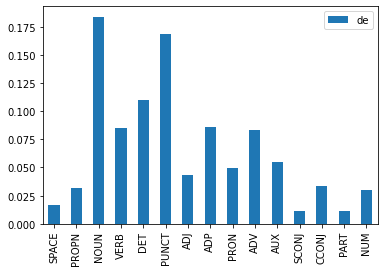

In [165]:
docPOS = pd.Series(doc.count_by(spacy.attrs.POS))/len(doc)

df = pd.DataFrame([docPOS], index=['de'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')